In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Personal Loan: This feature is considered as target which describes who has opted for the loan (0) and who has not opted for the loan (1)
Since ID feature doesn't much contribute to the data set, hence removed from the data set.

In [4]:
df=df.drop(['ID'],axis=1)

In [5]:
df.head(5)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#Find Null values in the data set:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

None of the columns in the data set have Null values.

In [7]:
#Finding of the duplicate values:
df.duplicated().sum()

0

None of the duplicate values are available in the data set.

In [8]:
#Since all the features in the data set are numerical hence describing the data:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


Analysis: There is a junk value in the 'Experience' column since there is a minimum value of '-3' which is an incorrect information.
Before correcting the junk data in the data set let us plot the distribution.

In [5]:
#!pip install seaborn
#!pip install matplotlib

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

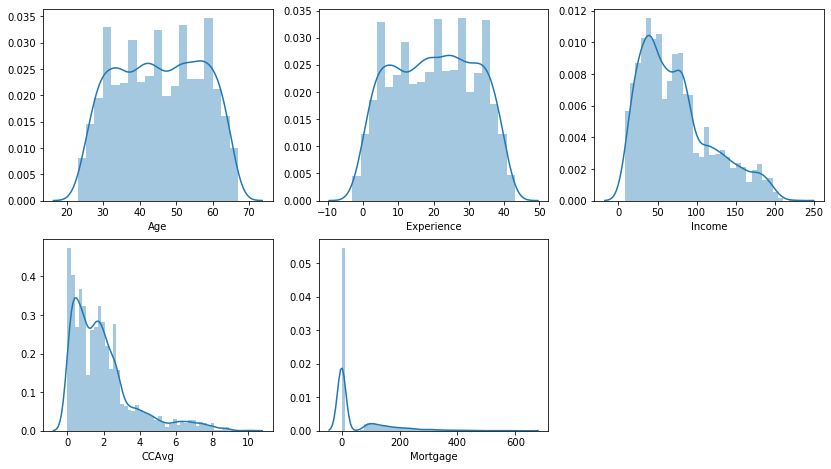

In [11]:
col=['Age', 'Experience', 'Income', 'CCAvg','Mortgage']

i=3
j=0
plt.figure(figsize=(14,12))
for k in col :
    plt.subplot(i,i,i*(j+1)//i)
    sns.distplot(df[k])
    j=j+1
plt.show()

**Age**: Mean value of age is 45.33 and the distribution is even across mean and hence normally distributed.

**Experience**: Even distribution across mean and hence normally distributed.

**Income**: Positively skewed that is median is lesser than the mean value.

**CCAvg**: Positively skewed that is median is lesser than the mean value.

**Mortgage**: Positively skewed that is median is lesser than the mean value.

In [12]:
# Replacing negative experience values with the median value in the Experience column:
negexp=df[df['Experience']<0]

In [13]:
negexp['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [14]:
negval=[-3, -2, -1]

for i in negval:
    df['Experience']=df['Experience'].replace(negval,np.median(df['Experience']))

In [15]:
df['Experience'].describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Negative values in the Experience column in the data set are replaced with the median value.

In [16]:
# Finding Corelation between the features:
cor=df.corr()

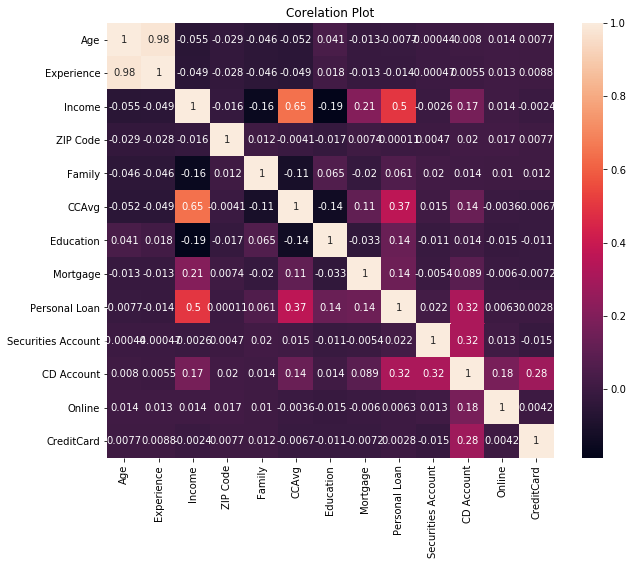

In [17]:
# Heatmap for Corelation:
plt.figure(figsize=(10,8))
plt.title("Corelation Plot")
sns.heatmap(cor,annot=True)
plt.show()

Experience and Age are highly positively corelated with eachother and hence one feature can be removed to avoid multi-colinearity issue.

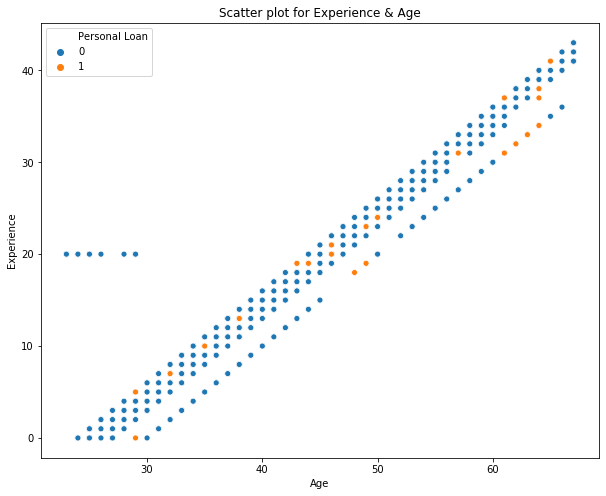

In [18]:
plt.figure(figsize=(10,8))
plt.title("Scatter plot for Experience & Age")
sns.scatterplot(x='Age',y='Experience', hue='Personal Loan', data=df)
plt.show()

Experience & Age are highly positively co-related and so Experience can be dropped.

In [19]:
df=df.drop(['Experience'],axis=1)

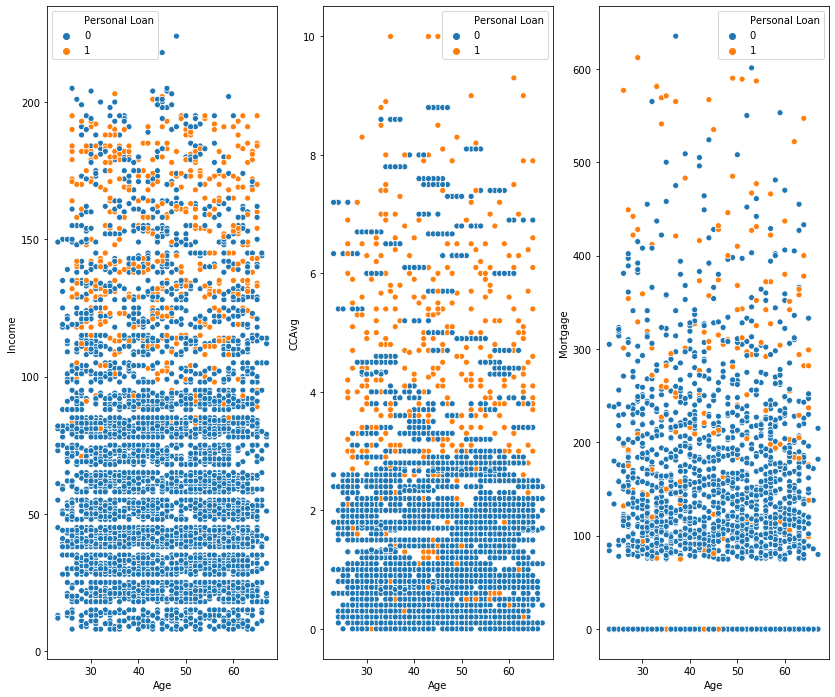

In [20]:
# Plotting Scatter plot for multivariate features:
col=['Income','CCAvg','Mortgage']
plt.figure(figsize=(14,12))
j=3
k=0
for i in col:
    plt.subplot(1,j,j*(k+1)//j)
    sns.scatterplot(x='Age',y=i,hue='Personal Loan', data=df)
    k=k+1
plt.show()

**Age v/s Income**: People with more income (>100$) seems to have opted for Personal Loan.

**Age v/s CCAvg**: Also people with high CCAvg seems to have opted for Personal Loan.

**Age v/s Mortgage**: People who have opted for Personal Loan are not much related with higher Mortgage value but people with Mortgage value greater than 400$ seems to have taken Personal Loan.

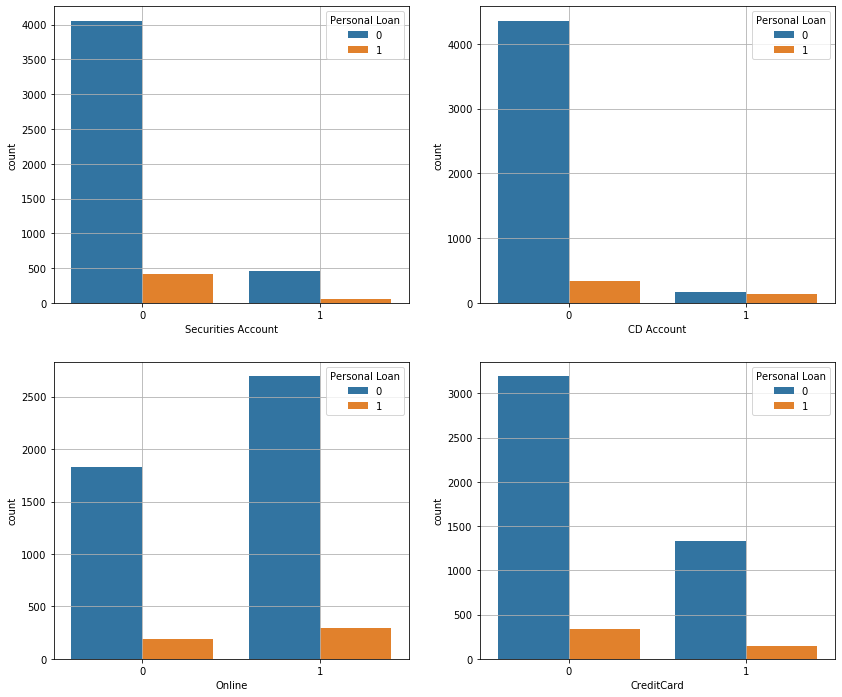

In [21]:
# Plotting Counts plot for Categorical features:
col=['Securities Account','CD Account','Online','CreditCard']
plt.figure(figsize=(14,12))
j=2
k=0
for i in col:
    plt.subplot(2,j,j*(k+1)//j)
    sns.countplot(x=i,hue='Personal Loan', data=df)
    k=k+1
    plt.grid(True)
plt.show()

People without the CD Accounts tend to have taken more Personal Loan.
People with more Online accounts seem to take more Personal Loan, where as very minimal number of people who have Securities Account have opted the Personal Loan.
Most of the people with the CreditCard seems to have not taken the Personal Loan.

In [22]:
df.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

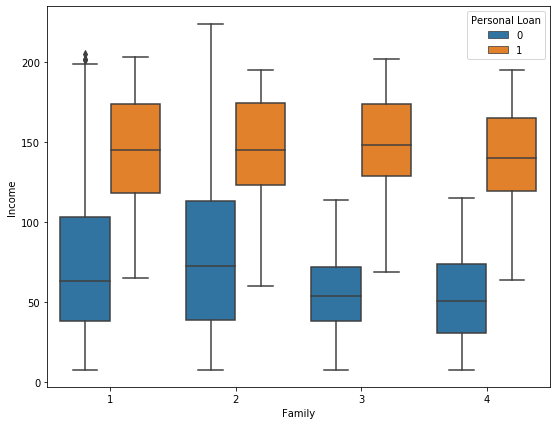

In [23]:
plt.figure(figsize=(9,7))
sns.boxplot(x='Family',y='Income',hue='Personal Loan', data=df)
plt.show()

People with high Income irrespective of the Family size seems to have opted for Personal Loan.

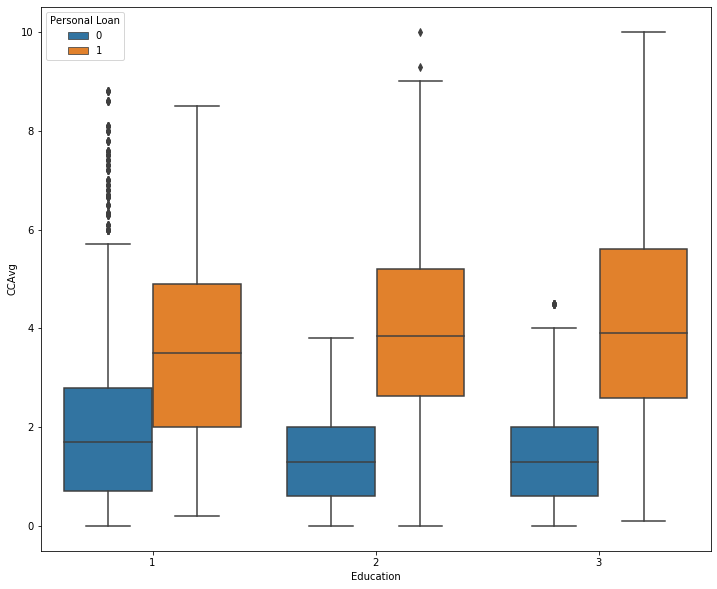

In [24]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Education',y='CCAvg',hue='Personal Loan', data=df)
plt.show()

Irrespective of Education, people who have good CCAvg > 2.5 seems to have opted out for the Personal Loan.

In [25]:
df.columns

Index(['Age', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [26]:
df=df.drop(['ZIP Code'],axis=1)

In [27]:
df1=df

In [28]:
df1['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [29]:
df.head(5)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [30]:
# Checking class balance for Personal Loan:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [31]:
# Class label has imbalanced data, so this feature needs to be re-balanced using upsample method:
# Splitting major & minor class data frames:
df_majority=df[df['Personal Loan']==0]
df_minority=df[df['Personal Loan']==1]

In [32]:
print("Majority calss shape {}".format(df_majority.shape))
print("Minority calss shape {}".format(df_minority.shape))

Majority calss shape (4520, 11)
Minority calss shape (480, 11)


In [33]:
# Upsampling:
from sklearn.utils import resample
df_minority_upsample=resample(df_minority,n_samples=4520)

In [34]:
df=pd.concat([df_majority,df_minority_upsample])

In [35]:
df['Personal Loan'].value_counts()

1    4520
0    4520
Name: Personal Loan, dtype: int64

In [36]:
# Model Building:
x=df.drop(['Personal Loan'],axis=1)
y=df['Personal Loan']

In [37]:
# Splitting of Data:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [38]:
# Decision Tree Model Prediction
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [39]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
y_pred_base=dt.predict(x_test)

In [41]:
# Finding Accuracy:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred_base)
print(acc)

0.9929941002949852


In [42]:
# Model validation:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred_base)

array([[1296,   19],
       [   0, 1397]])

**Accuracy**: (TP+TN)/(TP+TN+FP+FN)

**Classification Error**: (FP+FN)/(TP+TN+FP+FN) or 1-Accuracy

**Sensitivity**: When the actual value is positive, how often is the prediction correct. TP/FN+TP

**Specificity**: When the actual value is neagative, how often is the prediction correct. TN/TN+FP

**Precision**: When the positive value is predicted, how often is the prediction correct. TP/TP+FP

In [43]:
#Classification Report:
clf_report=classification_report(y_test,y_pred_base)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1315
           1       0.99      1.00      0.99      1397

    accuracy                           0.99      2712
   macro avg       0.99      0.99      0.99      2712
weighted avg       0.99      0.99      0.99      2712



In [44]:
# Hyper Parameter Tuning:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'],'max_depth':np.arange(1,50),'min_samples_leaf':[1,2,3,6,9,4]}
grid=GridSearchCV(dt,parameters)

In [45]:
model=grid.fit(x_train,y_train)

In [46]:
grid.best_score_

0.996207781503475

In [47]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 46, 'min_samples_leaf': 1}

In [48]:
clf_best=grid.best_estimator_

In [49]:
clf_best.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=46, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
y_pred_best=clf_best.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred_best)

0.9941002949852508

In [52]:
# Cross Validation:
from sklearn.model_selection import cross_val_score

In [53]:
cross_val=cross_val_score(clf_best,x,y,cv=10)
print(cross_val)

[0.99557522 0.99778761 1.         0.99668142 0.99336283 0.99446903
 0.99778761 0.99889381 0.99778761 0.99115044]


In [54]:
np.mean(cross_val)

0.996349557522124

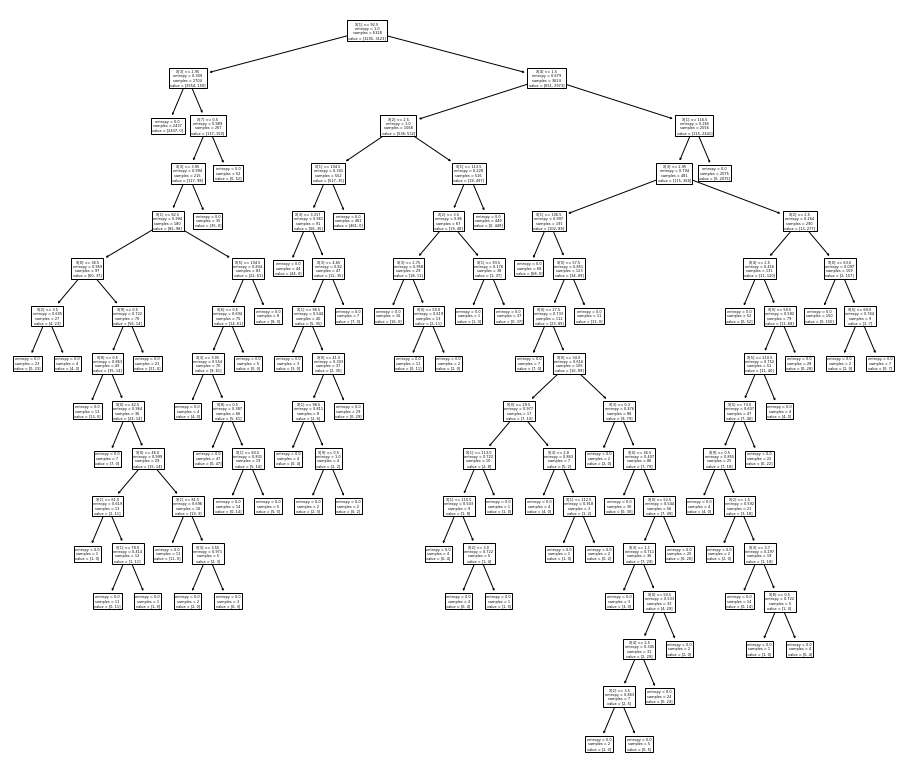

In [55]:
# Visualizg the Tree:
from sklearn import tree
plt.figure(figsize=(16,14))
tree.plot_tree(clf_best)
plt.show()

In [56]:
# For the imbalance data set:
x_imbal=df1.drop(['Personal Loan'],axis=1)
y_imbal=df1['Personal Loan']

In [57]:
x_train_imbal,x_test_imbal,y_train_imbal,y_test_imbal=train_test_split(x_imbal,y_imbal,test_size=0.3)

In [58]:
clf_best.fit(x_train_imbal,y_train_imbal)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=46, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
y_pred_imbal=clf_best.predict(x_test_imbal)

In [60]:
accuracy_score(y_test_imbal,y_pred_imbal)

0.9813333333333333